# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import xgboost as xgb
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from pylab import rcParams
%matplotlib inline
warnings.filterwarnings('ignore')

# Read data

In [28]:
data = pd.read_csv("C:\\Users\\Sneha Gaikwad\\Desktop\\Employee-Attrition.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

In [5]:
data.columns    #'StandardHours', 'Over18', 'EmployeeCount'

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### missing values visualization

In [7]:
null_feat = pd.DataFrame(len(data['Attrition']) - data.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Missing Values")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


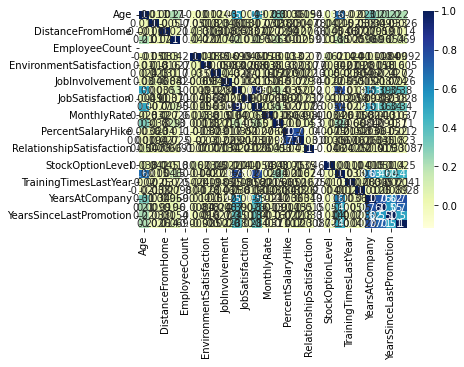

In [10]:
plot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.rcParams["figure.figsize"] = [30, 30] 

### Reassign target and drop useless features

In [11]:
# Reassign target
data.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
# Drop useless feat
data= data.drop(['Over18', 'EmployeeCount', 'StandardHours'], axis=1)


In [12]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [13]:
data.shape

(1470, 32)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

# Exploratory Data Analysis using automated EDA library

In [15]:
import dtale

In [16]:
#dtale.show(data)

# Feature engineering and selection


In [17]:
#dtypes: int64(26), object(9)
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [18]:
#No. of unique values in each column
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSince

In [19]:
#Dropping some more variables with the help of correlation matrix


cor_matrix = data.corr().abs()
print(cor_matrix)


                               Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000   0.159205   0.010661          0.001686   
Attrition                 0.159205   1.000000   0.056652          0.077924   
DailyRate                 0.010661   0.056652   1.000000          0.004985   
DistanceFromHome          0.001686   0.077924   0.004985          1.000000   
Education                 0.208034   0.031373   0.016806          0.021042   
EmployeeNumber            0.010145   0.010577   0.050990          0.032916   
EnvironmentSatisfaction   0.010146   0.103369   0.018355          0.016075   
HourlyRate                0.024287   0.006846   0.023381          0.031131   
JobInvolvement            0.029820   0.130016   0.046135          0.008783   
JobLevel                  0.509604   0.169105   0.002966          0.005303   
JobSatisfaction           0.004892   0.103481   0.030571          0.003669   
MonthlyIncome             0.497855   0.159840   0.007707        

In [20]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                          Age  Attrition  DailyRate  DistanceFromHome  \
Age                       NaN   0.159205   0.010661          0.001686   
Attrition                 NaN        NaN   0.056652          0.077924   
DailyRate                 NaN        NaN        NaN          0.004985   
DistanceFromHome          NaN        NaN        NaN               NaN   
Education                 NaN        NaN        NaN               NaN   
EmployeeNumber            NaN        NaN        NaN               NaN   
EnvironmentSatisfaction   NaN        NaN        NaN               NaN   
HourlyRate                NaN        NaN        NaN               NaN   
JobInvolvement            NaN        NaN        NaN               NaN   
JobLevel                  NaN        NaN        NaN               NaN   
JobSatisfaction           NaN        NaN        NaN               NaN   
MonthlyIncome             NaN        NaN        NaN               NaN   
MonthlyRate               NaN        NaN        NaN

In [21]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(to_drop)

['MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']


In [22]:
data = data.drop(['MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager'], axis=1)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,19479,8,Yes,11,1,0,0,1,6,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,24907,1,No,23,4,1,3,3,10,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2396,6,Yes,15,2,0,3,3,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,23159,1,Yes,11,3,0,3,3,8,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,16632,9,No,12,4,1,3,3,2,2


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

### Correlation matrix

In [24]:
#correlation
# correlation = data.corr()
# #tick labels
# matrix_cols = correlation.columns.tolist()
# #convert to array
# corr_array  = np.array(correlation)

# #Plotting
# trace = go.Heatmap(z = corr_array,
#                    x = matrix_cols,
#                    y = matrix_cols,
#                    colorscale='Viridis',
#                    colorbar   = dict() ,
#                   )
# layout = go.Layout(dict(title = 'Correlation Matrix for variables',
#                         autosize = False,
#                         #height  = 1400,
#                         #width   = 1600,
#                         margin  = dict(r = 0 ,l = 210,
#                                        t = 25,b = 210,
#                                      ),
#                         yaxis   = dict(tickfont = dict(size = 9)),
#                         xaxis   = dict(tickfont = dict(size = 9)),
#                        )
#                   )
# fig = go.Figure(data = [trace],layout = layout)
# py.iplot(fig)


### Remove collinear features

In [25]:
# # Threshold for removing correlated variables
# threshold = 0.8

# # Absolute value correlation matrix
# corr_matrix = data.corr().abs()
# corr_matrix.head()

# # Upper triangle of correlations
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# upper.head()

# # Select columns with correlations above threshold
# to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# print('There are %d columns to remove :' % (len(to_drop)))
# data = data.drop(columns = to_drop)

# to_drop

#  Employee Attrition Prediction and Model score analysis

In [26]:
#Importing required packages and libraries

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc,classification_report,roc_auc_score,plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from urllib.request import urlopen

In [29]:
#once again dropping unecessary columns and columns with more than 0.75 correlaion
df = data.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber','PerformanceRating','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager'], axis=1)

In [30]:
#Assigning category values to numerical colomns
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
df.Education.replace({1: 'High School',2:'Undergrad',3:'Graduate',4:'Post Graduate',5:'Doctorate'},inplace=True)
cols = ["JobInvolvement", "JobSatisfaction"]
for col in cols:
    df[col].replace({1 : "Low",2 : "Medium",3 : "High",4 : "Very High"}, inplace = True)

In [31]:
#features for attrition
var = []
for i in df.columns:
    var.append([i, df[i].nunique(), df[i].drop_duplicates().values])


In [32]:
#Extracting categorical variables from the data
categorical = []
for col, value in df.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
cat_var = df[categorical]

In [33]:
#Converting categorical data to indicator variables
dummies = pd.get_dummies(cat_var)
dummies.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Doctorate,Education_Graduate,Education_High School,Education_Post Graduate,...,JobRole_Sales Representative,JobSatisfaction_High,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [34]:
dummies.shape

(1470, 41)

In [35]:
#Normalizing the attrition variable x
x = MinMaxScaler().fit_transform(dummies)
y = df['Attrition'].values

## using Logistic Regression model from scratch

In [36]:
#Split train and test data in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [37]:
#Fitting model on training data
lr = LogisticRegression()
model_1 = lr.fit(X_train,y_train)
model_1

LogisticRegression()

In [38]:
#Storing model predictions on testing data
y_pred=lr.predict(X_test)

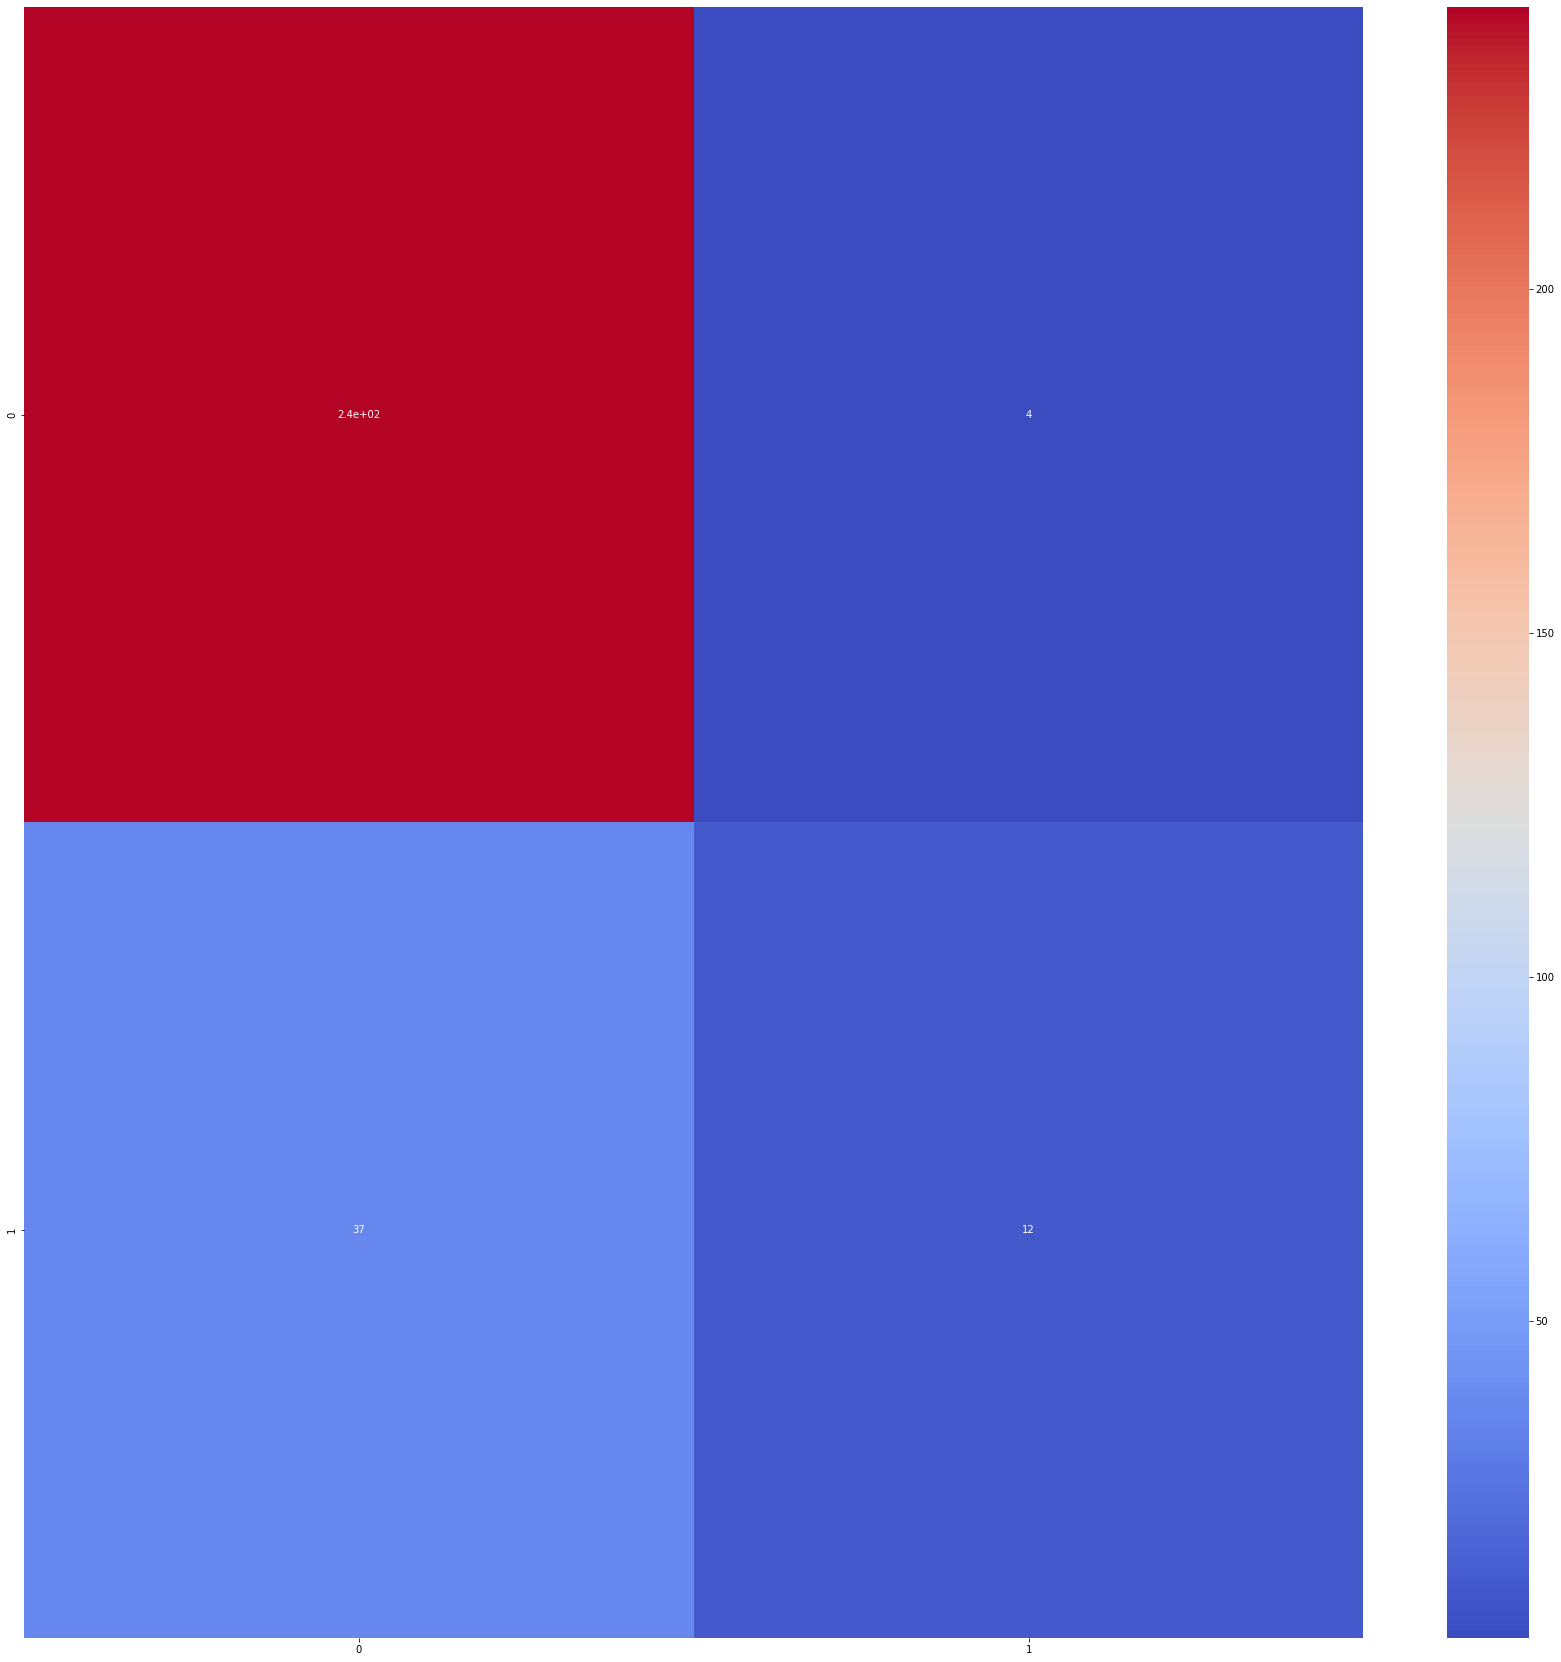

In [42]:
#Using seaborn for ploting heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,cmap ='coolwarm' )
plt.show()

In [43]:
#Print various scores of model 1 i.e.logistic regression
accuracy_1 = accuracy_score(y_test,y_pred)
print("Accuracy of logistic regression model is :",accuracy_1)
print("Precision of logistic regression model is :",metrics.precision_score(y_test, y_pred))
print("Recall of logistic regression model is :",metrics.recall_score(y_test, y_pred))

Accuracy of logistic regression model is : 0.8605442176870748
Precision of logistic regression model is : 0.75
Recall of logistic regression model is : 0.24489795918367346


## using K-Nearest Neighbours

In [44]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

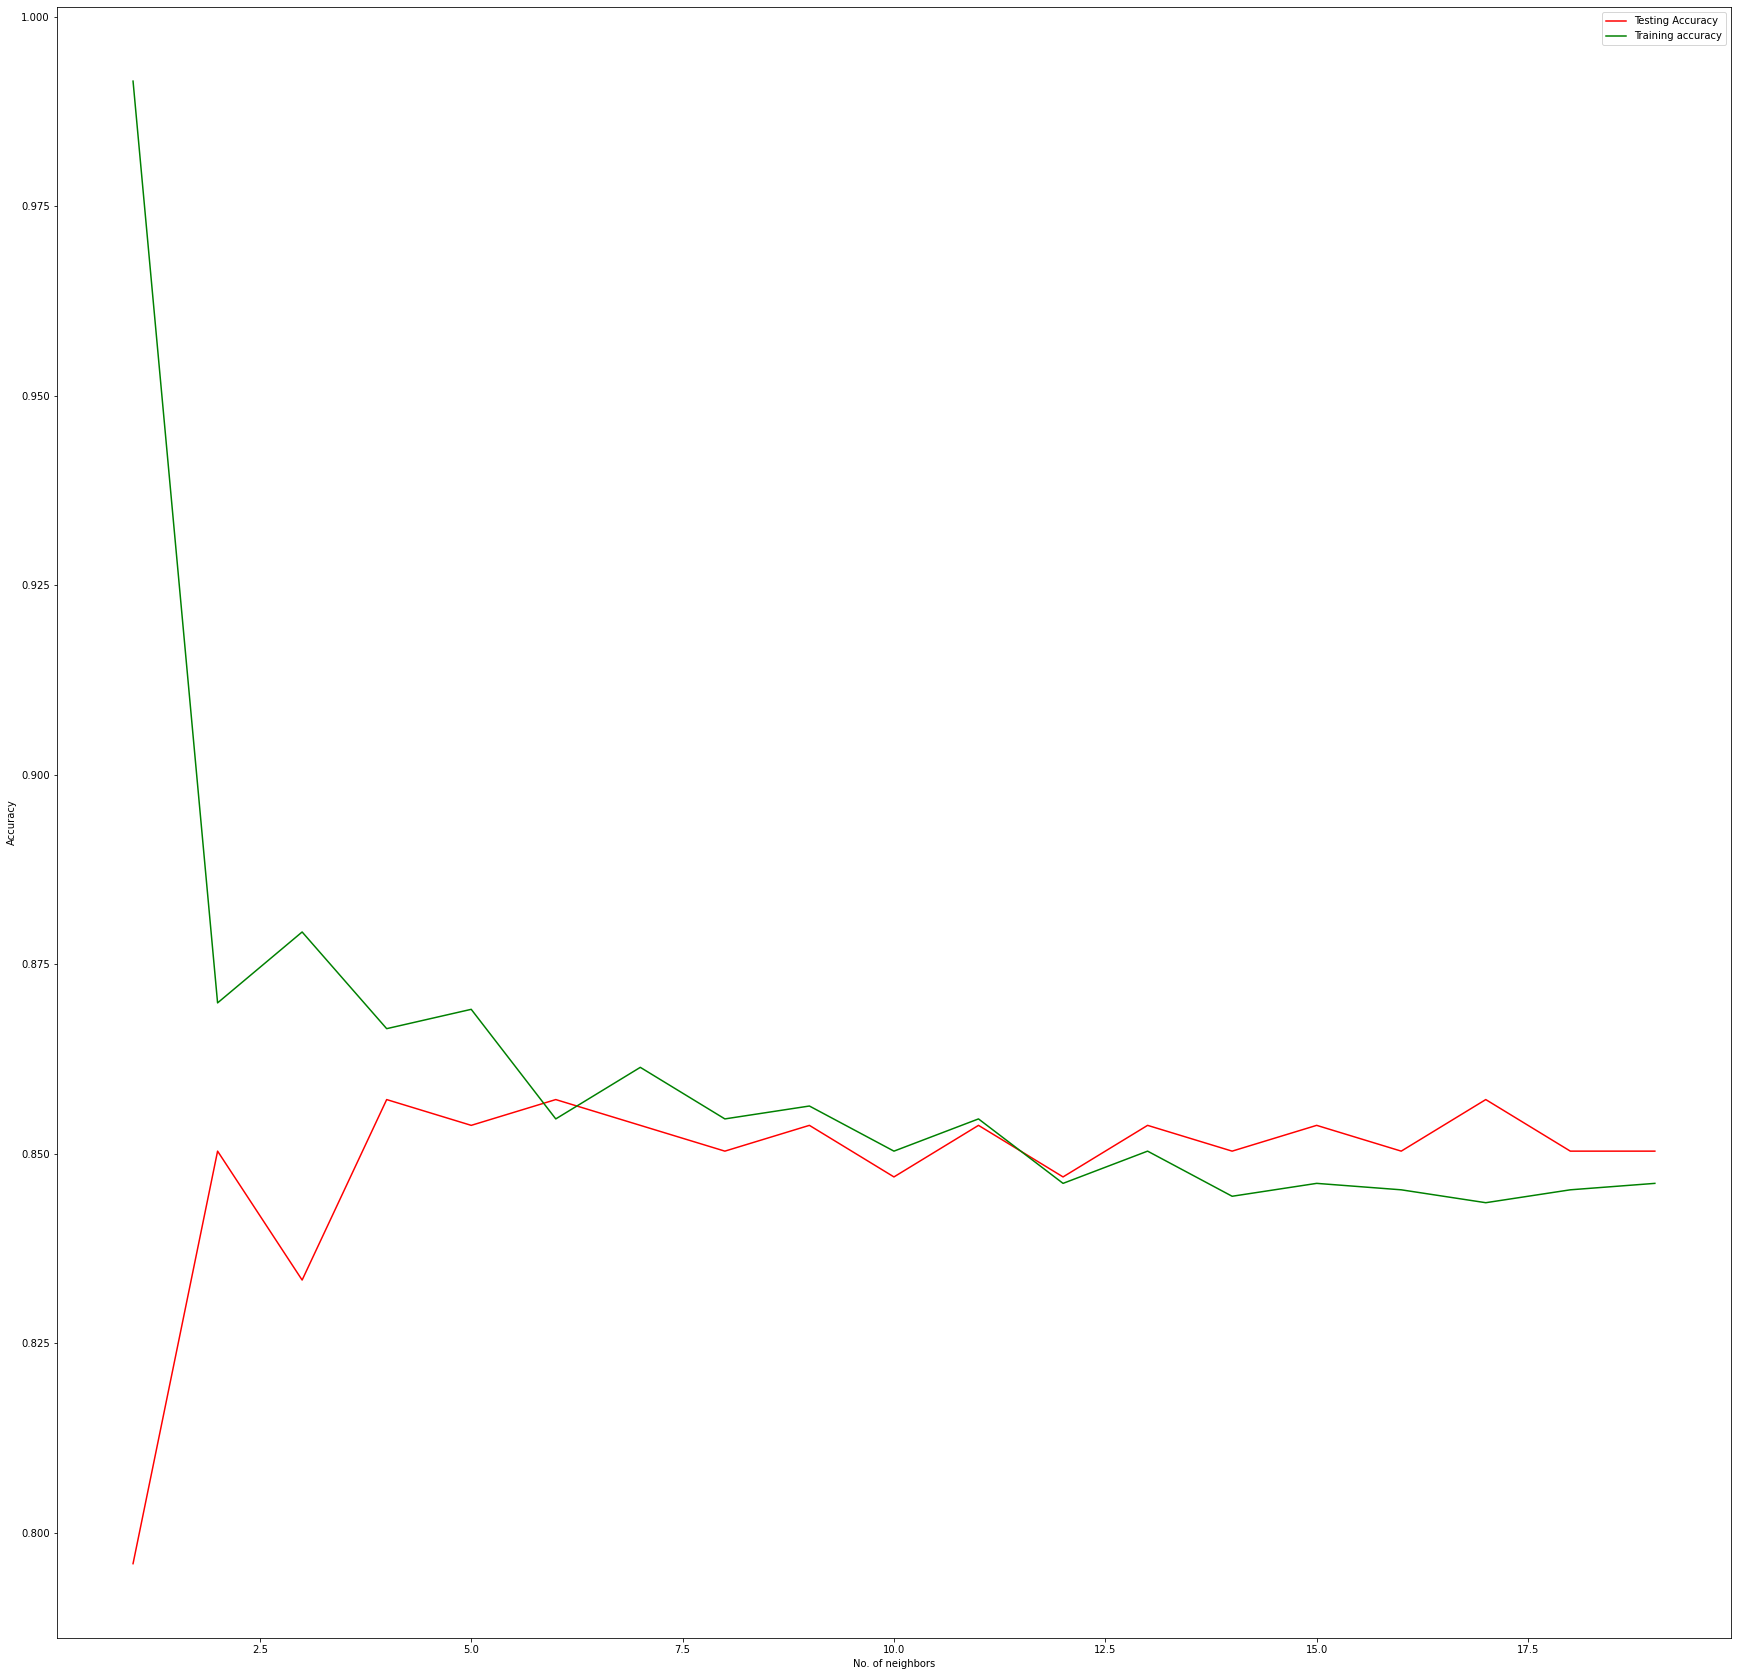

In [45]:
n = np.arange(1,20)
train =np.empty(len(n))
test = np.empty(len(n))

for i,k in enumerate(n):
    model4 = KNeighborsClassifier(n_neighbors=k)
    model4.fit(X_train, y_train)
    train[i] = model4.score(X_train, y_train)
    test[i] = model4.score(X_test, y_test) 

plt.plot(n, test, label='Testing Accuracy',color = 'red')
plt.plot(n, train, label='Training accuracy',color = 'green')
plt.legend()
plt.xlabel("No. of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [46]:
model_2 = KNeighborsClassifier(n_neighbors=6)
model_2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [47]:
model_2.score(X_test,y_test)

0.8571428571428571

In [48]:
accuracy_2 = model_2.score(X_test,y_test)

In [49]:
y_pred = model_2.predict(X_test)

In [50]:
confusion_matrix(y_test,y_pred)

array([[247,   0],
       [ 42,   5]], dtype=int64)

In [51]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,247,0,247
1,42,5,47
All,289,5,294


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       1.00      0.11      0.19        47

    accuracy                           0.86       294
   macro avg       0.93      0.55      0.56       294
weighted avg       0.88      0.86      0.81       294



## using Random Forest

In [53]:
rf = RandomForestClassifier(random_state=1)

In [54]:
model_3 = rf.fit(X_train, y_train)
y_pred_rf = model_3.predict(X_test)

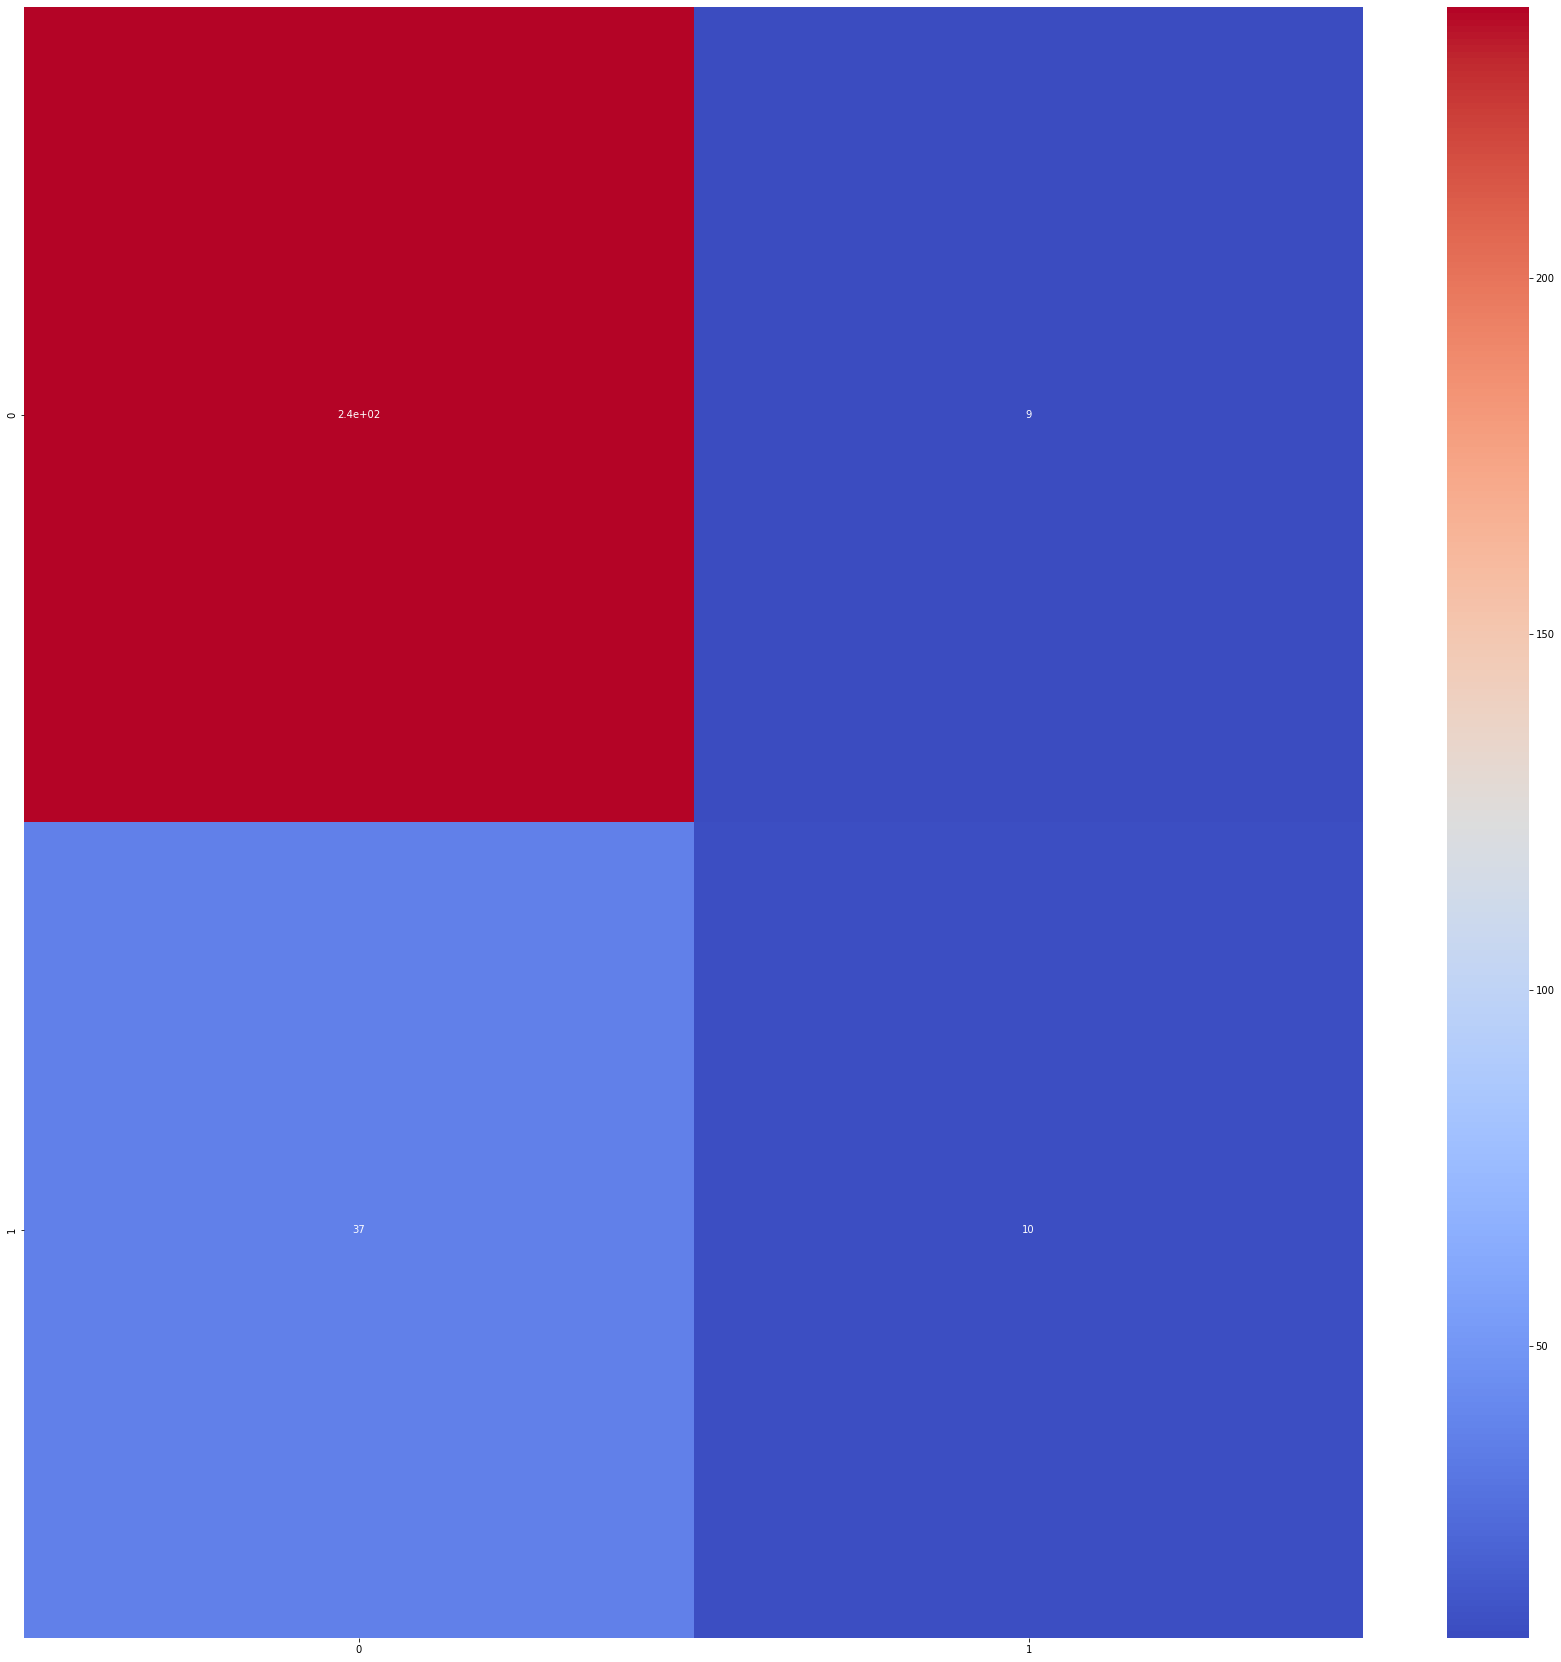

In [55]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True,cmap ='coolwarm' )
plt.rcParams["figure.figsize"] = [5, 5]
plt.show()


In [56]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       247
           1       0.53      0.21      0.30        47

    accuracy                           0.84       294
   macro avg       0.70      0.59      0.61       294
weighted avg       0.81      0.84      0.81       294



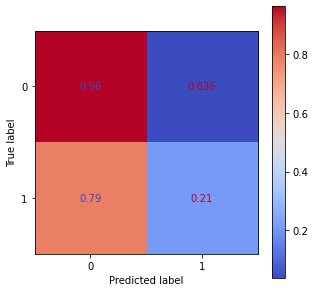

In [57]:
plot_confusion_matrix(rf, X_test, y_test, normalize="true",cmap ='coolwarm')

In [58]:
accuracy_3 = accuracy_score(y_test ,y_pred_rf)

Text(0, 0.5, 'Attrition variables')

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


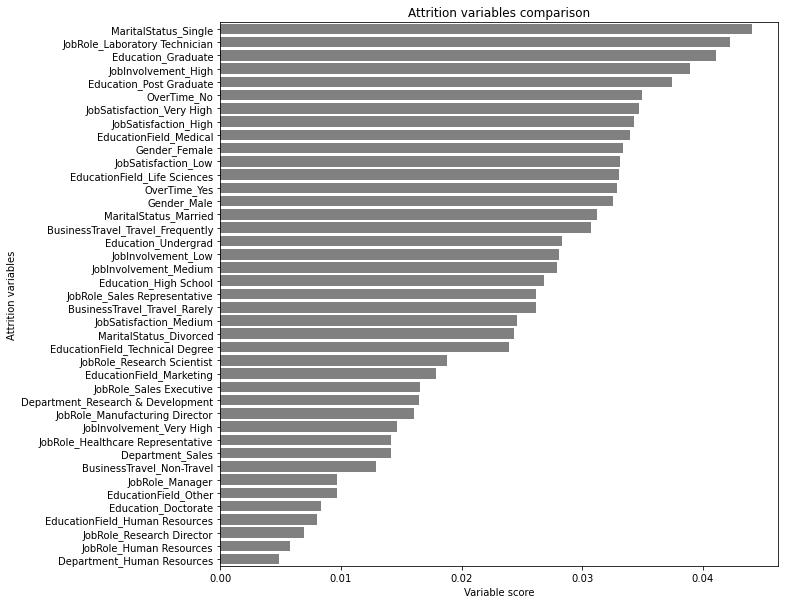

In [59]:
#Plotting relative importance of variables in determining attrition and primary area of focus 
imp = np.array(rf.feature_importances_)
cols = np.array(dummies.columns)
data={'variable_names':cols,'imp_variables':imp}
v = pd.DataFrame(data)
v.sort_values(by=['imp_variables'], ascending=False,inplace=True) 
plt.figure(figsize=(10,10))
sns.barplot(x=v['imp_variables'], y=v['variable_names'],color  = 'grey')
plt.title('Attrition variables comparison')
plt.xlabel('Variable score')
plt.ylabel('Attrition variables')

### model comparison

In [60]:
compare = pd.DataFrame({'Model' : [  'Logistic Regression','K-Nearest Neighbours','Random Forest'],'Score' : [accuracy_1,accuracy_2,accuracy_3]})

In [61]:
compare.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.860544
1,K-Nearest Neighbours,0.857143
2,Random Forest,0.843537


In [62]:
features_imp(xgb_clf, 'features')

NameError: name 'features_imp' is not defined